# Lab 2 : Edge Detection and Hough Transform
Below is the code given from the assignment. 


## Importing Libraries and prerequisites
Below are the all the functions and libraries that are used in this assignment. 

In [13]:
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt

from Functions import *
from gaussfft import gaussfft

Here are all the functions that were given to us to fill in 

In [14]:
# Computes delta x using central difference
def delta_x(image):
    # Using a 3x3 filter mask --> from the lecture
    dx = np.array([[0, 0, 0], [0.5, 0, -0.5], [0, 0, 0]])
    dx_mask = convolve2d(image, dx, mode="same")
    return dx_mask


# Computes delta y using central difference
def delta_y(image):
    # Using a 3x3 filter mask --> from the lecture
    dy = np.array([[0, 0.5, 0], [0, 0, 0], [0, -0.5, 0]])
    dy_mask = convolve2d(image, dy, mode="same")
    return dy_mask


def sobel_x(image):
    # Using a 3x3 filter mask --> from the lecture
    dx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    dx_mask = convolve2d(image, dx, mode="same")
    return dx_mask


def sobel_y(image):
    """Calculate image dy using Sobel filter"""
    # Create Sobel filter
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    # Convolve image with Sobel filter
    dy = convolve2d(image, sobel_y, mode="same")
    return dy


# @TODO: Implement this function
def Lv(inpic, shape="same"):
    gradient_x = sobel_x(inpic)
    gradient_y = sobel_y(inpic)
    # Return the sum of the squares of the gradients
    return ((gradient_x ** 2) + (gradient_y ** 2)) 


# @TODO: Implement this function
def Lvvtilde(inpic, shape="same"):
    # ...
    pass


# @TODO: Implement this function
def Lvvvtilde(inpic, shape="same"):
    # ...
    pass


# @TODO: Implement this function
def extractedge(inpic, scale, threshold, shape):
    # ...
    pass


# @TODO: Implement this function
def houghline(curves, magnitude, nrho, ntheta, threshold, nlines=20, verbose=False):
    # ...
    pass


# @TODO: Implement this function
def houghedgeline(
    pic, scale, gradmagnthreshold, nrho, ntheta, nlines=20, verbose=False
):
    # ...
    pass

### Question 1
What do you expect the results to look like and why? Compare the size of dxtools with the size of tools. Why are these sizes different?

**Answer** <br>
I used both the central differences and the sobel operator to find the edges of the image. The sobel operator seems to catches the edges slighly better than the central differences. <br>
The images shows the edges in the X and Y direction depending on the direction of the filter used to find the edges. The sizes of the tools seems slighly smaller, probably because it's not possible to slide the filter over the border of the image. 

<br>
Below is the code

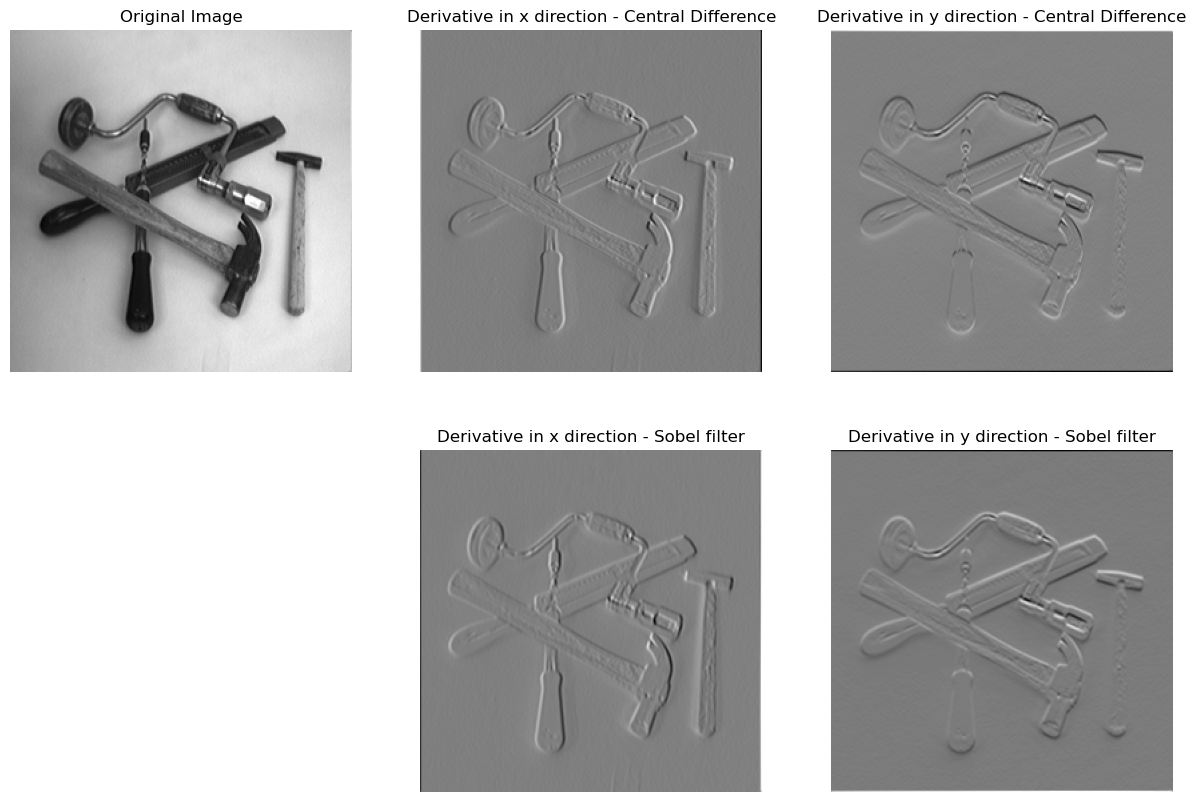

In [15]:
def q1():
    tools = np.load("Images-npy/few256.npy")

    deriv_x = delta_x(tools)
    deriv_y = delta_y(tools)

    sobel_x_img = sobel_x(tools)
    sobel_y_img = sobel_y(tools)

    # Create a figure with 2x3 subplots
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    # Plot the original image
    ax[0, 0].imshow(tools, cmap="gray")
    ax[0, 0].set_title("Original Image")
    ax[0, 0].axis("off")

    # Plot the derivative in x direction
    ax[0, 1].imshow(deriv_x, cmap="gray")
    ax[0, 1].set_title("Derivative in x direction - Central Difference")
    ax[0, 1].axis("off")

    # Plot the derivative in y direction
    ax[0, 2].imshow(deriv_y, cmap="gray")
    ax[0, 2].set_title("Derivative in y direction - Central Difference")
    ax[0, 2].axis("off")

    # Plot the derivative in x direction
    ax[1, 1].imshow(sobel_x_img, cmap="gray")
    ax[1, 1].set_title("Derivative in x direction - Sobel filter")
    ax[1, 1].axis("off")

    # Plot the derivative in y direction
    ax[1, 2].imshow(sobel_y_img, cmap="gray")
    ax[1, 2].set_title("Derivative in y direction - Sobel filter")
    ax[1, 2].axis("off")

    # Remove the axis on subplot [1, 0]
    ax[1, 0].axis("off")

    plt.show()


q1()

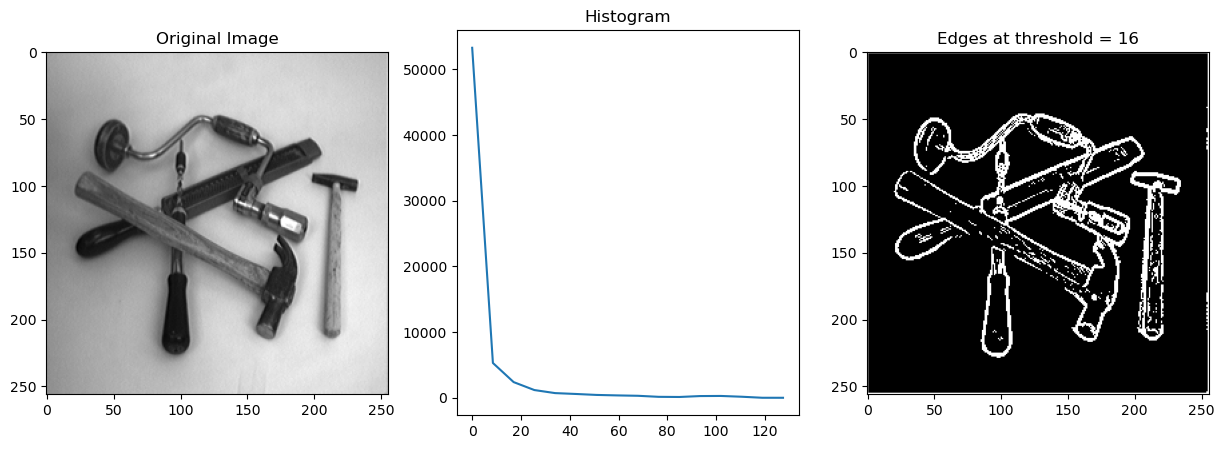

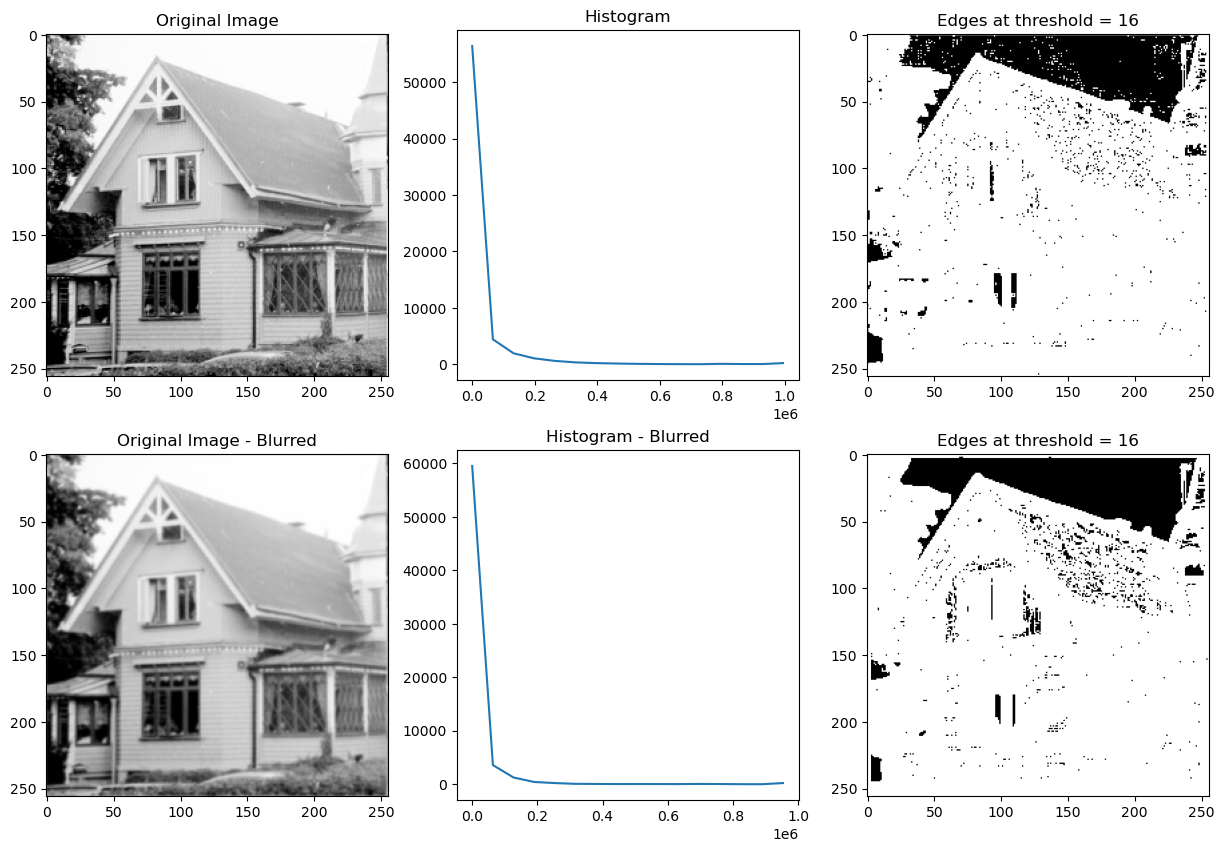

In [16]:
# @TODO fix this function
def q2():
    # Grabbing the image and computing the gradient
    tools = np.load("Images-npy/few256.npy")
    delta_x_img = delta_x(tools)
    delta_y_img = delta_y(tools)

    # Magnitude of the gradient
    magnitude = np.sqrt(delta_x_img**2 + delta_y_img**2)
    histogram = np.histogram(magnitude, bins=16)

    threshold = 16
    edges = magnitude > threshold
    # Plot the original, histogram and transformed image
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(tools, cmap="gray")
    ax[0].set_title("Original Image")
    ax[1].plot(histogram[1][:-1], histogram[0])
    ax[1].set_title("Histogram")
    ax[2].imshow(edges, cmap="gray")
    ax[2].set_title("Edges at threshold = {}".format(threshold))
    plt.show()

    # Now we gotta do the same for image godthem256
    godthem = np.load("Images-npy/godthem256.npy")
    godthem_blurred = np.real(gaussfft(godthem, 0.5))

    # Sobel filter to the blurred image and histogram
    magnitude_godthem = Lv(godthem)
    magnitude_godthem_blurred = Lv(godthem_blurred)

    # histogram of the images
    histogram_godthem = np.histogram(magnitude_godthem, bins=16)
    histogram_godthem_blurred = np.histogram(magnitude_godthem_blurred, bins=16)

    # threshold and edges
    threshold = 16

    edges_godthem = magnitude_godthem > threshold
    edges_godthem_blurred = magnitude_godthem_blurred > threshold

    # Create 2x3 subplots
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    # Plot the original image
    ax[0, 0].imshow(godthem, cmap="gray")
    ax[0, 0].set_title("Original Image")

    # Plot the histogram
    ax[0, 1].plot(histogram_godthem[1][:-1], histogram_godthem[0])
    ax[0, 1].set_title("Histogram")

    # Plot the edges
    ax[0, 2].imshow(edges_godthem, cmap="gray")
    ax[0, 2].set_title("Edges at threshold = {}".format(threshold))

    # Plot the original image
    ax[1, 0].imshow(godthem_blurred, cmap="gray")
    ax[1, 0].set_title("Original Image - Blurred")

    # Plot the histogram
    ax[1, 1].plot(histogram_godthem_blurred[1][:-1], histogram_godthem_blurred[0])
    ax[1, 1].set_title("Histogram - Blurred")

    # Plot the edges
    ax[1, 2].imshow(edges_godthem_blurred, cmap="gray")
    ax[1, 2].set_title("Edges at threshold = {}".format(threshold))
    plt.show()


q2()

## Question 3:
Does smoothing the image help to find edges?

**Answer** <br>
Smoothing the image does help to find the edges. Smoothing reduces the noise which makes the edges more distinguishable. The blurring helps to merge pixel values in a region which makes them less sharp but more uniform. When edge detection algorithms are then used it becomes easier to identify the transitions in pixel values that denote edges.  <br>

Important to note that there are different types of blurring filters. You need to find the right balance of it. 

## Question 4 
What can you observe? Provide explaination based on the generated images. 

**Answer** <br>
The answer is :<br>

Below is the code:

In [49]:
# First order derivative
from tabnanny import check


dx_filter = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0.5, 0, -0.5, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)
dy_filter = dx_filter.T

# Second order derivative
dxx_filter = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 1, -2, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)
dxy_filter = convolve2d(dx_filter, dy_filter, mode="same")
dyy_filter = dxx_filter.T

# Third order derivative --> We want the same size thereby same
dxxx_filter = convolve2d(dxx_filter, dx_filter, mode="same")
dxxy_filter = convolve2d(dxx_filter, dy_filter, mode="same")
dxyy_filter = convolve2d(dxy_filter, dy_filter, mode="same")
dyyy_filter = convolve2d(dyy_filter, dy_filter, mode="same")


def q4_gradient_checker():
    [x, y] = np.meshgrid(range(-5, 6), range(-5, 6))
    deriv_xxx = convolve2d(x**3, dxxx_filter, mode="valid")
    deriv_xx = convolve2d(x**2, dxx_filter, mode="valid")
    deriv_xxy = convolve2d(x**2 * y, dxxy_filter, mode="valid")
    deriv_higher = convolve2d(x, dxxx_filter, mode="valid")
    deriv_y_with_x = convolve2d(y, dxx_filter, mode="valid")

    # Analytical derivatives
    analytical_xxx = np.full(deriv_xxx.shape, 6)
    analytical_xx = np.full(deriv_xx.shape, 2)
    analytical_xxy = np.full(deriv_xxy.shape, 2)
    analytical_x = np.full(deriv_xxx.shape, 0)
    analytical_y_with_x = np.full(deriv_y_with_x.shape, 0)

    # Check if it derivates correct
    check_1 = np.allclose(deriv_xxx, analytical_xxx)
    check_2 = np.allclose(deriv_xx, analytical_xx)
    check_3 = np.allclose(deriv_xxy, analytical_xxy)
    check_4 = np.allclose(deriv_higher, analytical_x)
    check_5 = np.allclose(deriv_y_with_x, analytical_y_with_x)

    if (check_1 | check_2 | check_3 | check_4 | check_5) == False:
        return False
    else:
        return True
    

def q4():
    check_derivs = q4_gradient_checker()
    if not check_derivs:
        print("The derivatives are not correct")
    print("The derivs are correct")
    



q4()

hello world
